### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [2]:
data=pd.read_csv("C:/Users/usind/Downloads/Datasets-main/Datasets-main/TaxiFare.csv", nrows=25000)

In [3]:
data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.shape

(25000, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             25000 non-null  object 
 1   amount                25000 non-null  float64
 2   date_time_of_pickup   25000 non-null  object 
 3   longitude_of_pickup   25000 non-null  float64
 4   latitude_of_pickup    25000 non-null  float64
 5   longitude_of_dropoff  25000 non-null  float64
 6   latitude_of_dropoff   25000 non-null  float64
 7   no_of_passenger       25000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


In [6]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,11.326657,-72.508540,39.934394,-72.511338,39.923637,1.66496
std,9.531149,10.420340,6.516562,10.407299,6.093153,1.28638
min,-3.000000,-75.414728,-74.006893,-84.654241,-74.006377,0.00000
25%,6.000000,-73.992160,40.734747,-73.991195,40.734566,1.00000
50%,8.500000,-73.981768,40.752727,-73.980197,40.753631,1.00000
75%,12.500000,-73.967050,40.767296,-73.963645,40.768229,2.00000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.00000


In [7]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
import pandas as pd

# Assume 'df' is your DataFrame with a column 'date_time_of_pickup' containing date-time information

# Convert 'date_time_of_pickup' column to datetime
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S %Z')

# Extract date and time into separate columns
data['pickup_date'] = data['date_time_of_pickup'].dt.date
data['pickup_time'] = data['date_time_of_pickup'].dt.time

# Display the DataFrame with separate date and time columns
print(data)



      unique_id  amount       date_time_of_pickup  longitude_of_pickup  \
0       26:21.0     4.5 2009-06-15 17:26:21+00:00           -73.844311   
1       52:16.0    16.9 2010-01-05 16:52:16+00:00           -74.016048   
2       35:00.0     5.7 2011-08-18 00:35:00+00:00           -73.982738   
3       30:42.0     7.7 2012-04-21 04:30:42+00:00           -73.987130   
4       51:00.0     5.3 2010-03-09 07:51:00+00:00           -73.968095   
...         ...     ...                       ...                  ...   
24995   38:00.0     6.1 2011-05-24 12:38:00+00:00           -73.966860   
24996   30:05.0     3.0 2015-03-28 22:30:05+00:00           -73.982765   
24997   00:52.0    11.0 2012-12-02 12:00:52+00:00           -73.981589   
24998   53:01.0    16.5 2014-08-21 07:53:01+00:00           -73.946118   
24999   33:57.0    10.0 2015-06-21 10:33:57+00:00           -73.966209   

       latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0               40.721319            -7

In [9]:
data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_time
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00


In [10]:
data.drop(columns=['date_time_of_pickup'], inplace=True)

In [11]:
data.head(5)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_time
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00


In [12]:
# Convert 'mixed_date' column to datetime format
data['pickup_date'] = pd.to_datetime(data['pickup_date'])

# Extract year, month, and day into separate columns
data['year'] = data['pickup_date'].dt.year
data['month'] = data['pickup_date'].dt.month
data['day'] = data['pickup_date'].dt.day

# Display the updated DataFrame with separated date components
print(data)


      unique_id  amount  longitude_of_pickup  latitude_of_pickup  \
0       26:21.0     4.5           -73.844311           40.721319   
1       52:16.0    16.9           -74.016048           40.711303   
2       35:00.0     5.7           -73.982738           40.761270   
3       30:42.0     7.7           -73.987130           40.733143   
4       51:00.0     5.3           -73.968095           40.768008   
...         ...     ...                  ...                 ...   
24995   38:00.0     6.1           -73.966860           40.757367   
24996   30:05.0     3.0           -73.982765           40.731277   
24997   00:52.0    11.0           -73.981589           40.724528   
24998   53:01.0    16.5           -73.946118           40.777405   
24999   33:57.0    10.0           -73.966209           40.761841   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger pickup_date  \
0                -73.841610            40.712278                1  2009-06-15   
1                -73.

In [13]:
data.head(5)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_time,year,month,day
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,2009,6,15
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,2010,1,5
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,2011,8,18
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,2012,4,21
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,2010,3,9


In [14]:
# Extract hour, minute, and second into separate columns
data['hour'] = data['pickup_time'].apply(lambda x: x.hour)
data['minute'] = data['pickup_time'].apply(lambda x: x.minute)
data['second'] = data['pickup_time'].apply(lambda x: x.second)

# Display the updated DataFrame with separated time components
print(data)


      unique_id  amount  longitude_of_pickup  latitude_of_pickup  \
0       26:21.0     4.5           -73.844311           40.721319   
1       52:16.0    16.9           -74.016048           40.711303   
2       35:00.0     5.7           -73.982738           40.761270   
3       30:42.0     7.7           -73.987130           40.733143   
4       51:00.0     5.3           -73.968095           40.768008   
...         ...     ...                  ...                 ...   
24995   38:00.0     6.1           -73.966860           40.757367   
24996   30:05.0     3.0           -73.982765           40.731277   
24997   00:52.0    11.0           -73.981589           40.724528   
24998   53:01.0    16.5           -73.946118           40.777405   
24999   33:57.0    10.0           -73.966209           40.761841   

       longitude_of_dropoff  latitude_of_dropoff  no_of_passenger pickup_date  \
0                -73.841610            40.712278                1  2009-06-15   
1                -73.

In [15]:
data.head(5)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_date,pickup_time,year,month,day,hour,minute,second
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,17:26:21,2009,6,15,17,26,21
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,16:52:16,2010,1,5,16,52,16
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,00:35:00,2011,8,18,0,35,0
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,04:30:42,2012,4,21,4,30,42
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,07:51:00,2010,3,9,7,51,0


In [16]:
data.drop(columns=['pickup_date','pickup_time'], inplace=True)

In [17]:
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
data['haversine_distance'] = haversine_distance(data['latitude_of_pickup'].values,
                                              data['longitude_of_pickup'].values,
                                              data['latitude_of_dropoff'].values,
                                              data['longitude_of_dropoff'].values)

In [18]:
data.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,day,hour,minute,second,haversine_distance
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,21,1.030764
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,16,8.450134
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,0,1.389525
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,42,2.799270
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,0,1.999157


In [19]:
data.drop(columns=['longitude_of_pickup','unique_id','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'], inplace=True)

In [20]:
data.head()

,amount,no_of_passenger,year,month,day,hour,minute,second,haversine_distance
0,4.5,1,2009,6,15,17,26,21,1.030764
1,16.9,1,2010,1,5,16,52,16,8.450134
2,5.7,2,2011,8,18,0,35,0,1.389525
3,7.7,1,2012,4,21,4,30,42,2.799270
4,5.3,1,2010,3,9,7,51,0,1.999157


In [21]:
data["no_of_passenger"].value_counts()

1    17404
2     3695
5     1683
3     1087
4      537
6      501
0       93
Name: no_of_passenger, dtype: int64

<Axes: xlabel='amount', ylabel='count'>

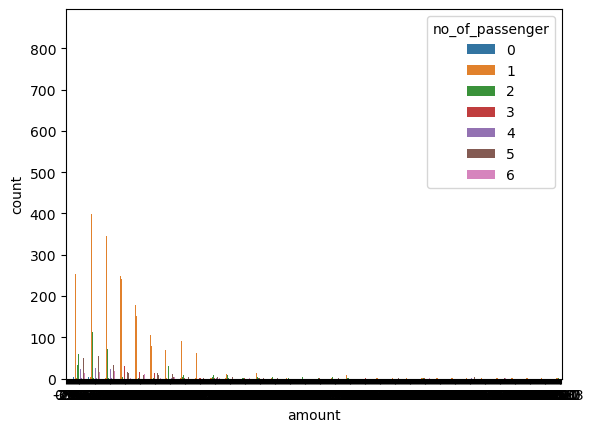

In [22]:
sns.countplot(x="amount", hue="no_of_passenger", data=data)

In [23]:
data.isnull().sum()

amount                0
no_of_passenger       0
year                  0
month                 0
day                   0
hour                  0
minute                0
second                0
haversine_distance    0
dtype: int64

In [24]:
data.head()

,amount,no_of_passenger,year,month,day,hour,minute,second,haversine_distance
0,4.5,1,2009,6,15,17,26,21,1.030764
1,16.9,1,2010,1,5,16,52,16,8.450134
2,5.7,2,2011,8,18,0,35,0,1.389525
3,7.7,1,2012,4,21,4,30,42,2.799270
4,5.3,1,2010,3,9,7,51,0,1.999157


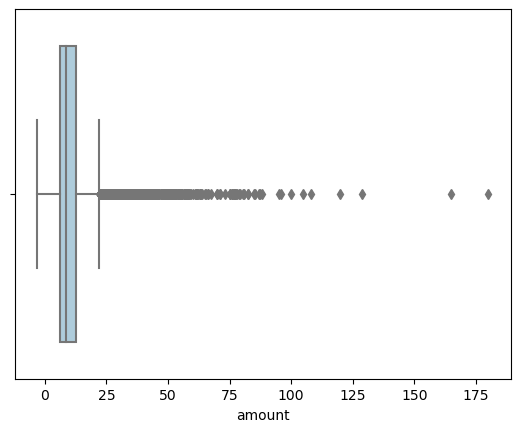

In [25]:
sns.boxplot(x="amount",data=data,palette="Paired")
plt.show()

### Treating the outliers

In [26]:
q1=6
q3=12.5
iqr=q3-q1
iqr
### q1-1.5*iqr=10.5
### q3+1.5*iqr=46.5

6.5

In [27]:
lower_threshold=q1-1.5*iqr

lower_threshold

-3.75

In [28]:
upper_threshold=q3+1.5*iqr
upper_threshold

22.25

In [29]:
data=data[(data["amount"]>=lower_threshold)&(data["amount"]<=upper_threshold)]

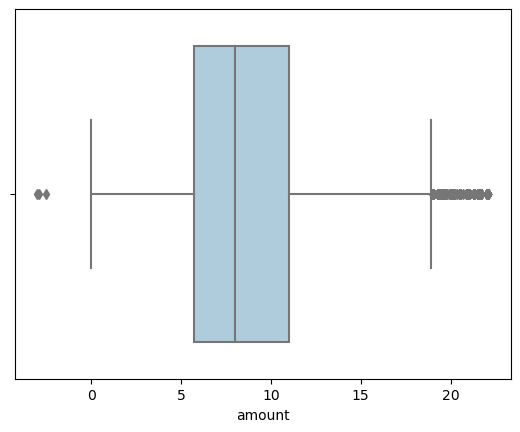

In [30]:
sns.boxplot(x="amount",data=data,palette="Paired")
plt.show()

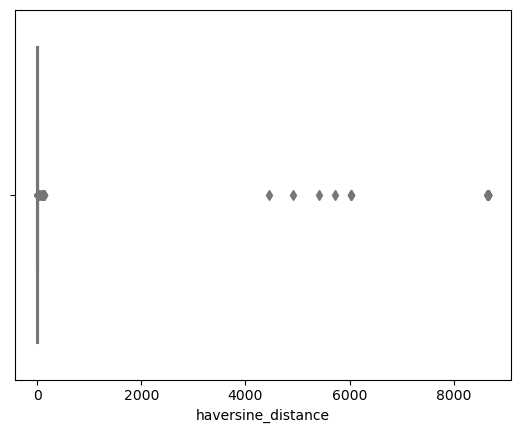

In [31]:
sns.boxplot(x="haversine_distance",data=data,palette="Paired")
plt.show()


In [32]:
data.describe()

,amount,no_of_passenger,year,month,day,hour,minute,second,haversine_distance
count,22827.000000,22827.000000,22827.000000,22827.000000,22827.000000,22827.00000,22827.000000,22827.000000,22827.000000
mean,8.940312,1.660315,2011.707539,6.239366,15.701319,13.53187,29.693740,16.114820,15.602056
std,4.138443,1.285771,1.858500,3.458343,8.691303,6.49846,17.288553,19.492139,328.455353
min,-3.000000,0.000000,2009.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,5.700000,1.000000,2010.000000,3.000000,8.000000,9.00000,15.000000,0.000000,1.177842
50%,8.000000,1.000000,2012.000000,6.000000,16.000000,14.00000,30.000000,5.000000,1.964728
75%,11.000000,2.000000,2013.000000,9.000000,23.000000,19.00000,45.000000,32.000000,3.293580
max,22.100000,6.000000,2015.000000,12.000000,31.000000,23.00000,59.000000,59.000000,8667.542104


In [33]:
q1=1.177842
q3=3.293580
iqr=q3-q1
iqr

2.115738

In [34]:
lower_threshold=q1-1.5*iqr

lower_threshold

-1.9957649999999996

In [35]:
upper_threshold=q3+1.5*iqr
upper_threshold

6.467186999999999

In [36]:
data=data[(data["haversine_distance"]>=lower_threshold)&(data["haversine_distance"]<=upper_threshold)]

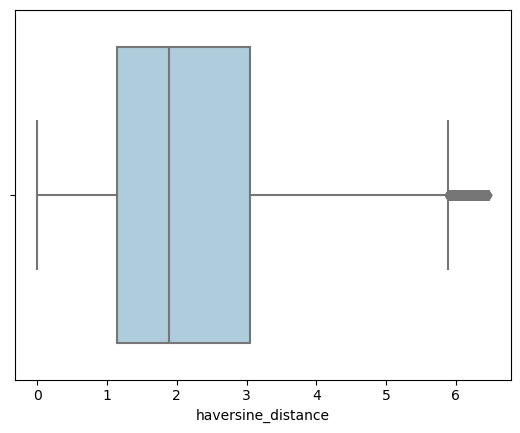

In [37]:
sns.boxplot(x="haversine_distance",data=data,palette="Paired")
plt.show()


In [38]:
data.head(5)

,amount,no_of_passenger,year,month,day,hour,minute,second,haversine_distance
0,4.5,1,2009,6,15,17,26,21,1.030764
2,5.7,2,2011,8,18,0,35,0,1.389525
3,7.7,1,2012,4,21,4,30,42,2.799270
4,5.3,1,2010,3,9,7,51,0,1.999157
5,12.1,1,2011,1,6,9,50,45,3.787239


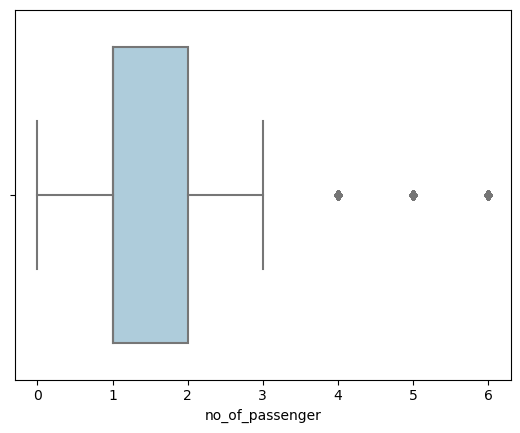

In [39]:
sns.boxplot(x="no_of_passenger",data=data,palette="Paired")
plt.show()


In [40]:
q1=1
q3=2
iqr=q3-q1
iqr

1

In [41]:
lower_threshold=q1-1.5*iqr

lower_threshold

-0.5

In [42]:
upper_threshold=q3+1.5*iqr
upper_threshold

3.5

In [43]:
data=data[(data["no_of_passenger"]>=lower_threshold)&(data["no_of_passenger"]<=upper_threshold)]

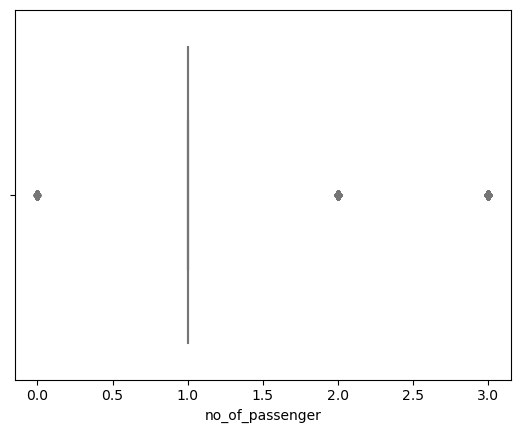

In [44]:
sns.boxplot(x="no_of_passenger",data=data,palette="Paired")
plt.show()


In [45]:
x=data.drop(["amount","minute","second"],axis=1)
y=data[["amount"]]

In [46]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30,random_state=0)

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model=LinearRegression()

In [49]:
model.fit(x_train, y_train)

LinearRegression()

In [50]:
model.score(x_train, y_train)

0.6096250660684531

In [51]:
model.score(x_test, y_test)

0.6275070940592601

### Decision Tree Regression

In [52]:
from sklearn.tree import DecisionTreeRegressor


In [53]:
model_dtr=DecisionTreeRegressor(random_state=7,max_depth=5)

In [54]:
model_dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=7)

In [55]:
model_dtr.score(x_train,y_train)

0.6602389470317178

In [56]:
model_dtr.score(x_test,y_test)


0.64683194571339

### standardization

In [57]:
from scipy.stats import zscore

In [58]:
xscaled=x.apply(zscore)

In [59]:
x_train , x_test , y_train , y_test = train_test_split(xscaled, y, test_size=0.30,random_state=0)

### Support Vector Regressor


In [60]:
from sklearn.svm import SVR



In [61]:
 model_svr=SVR()

In [62]:
model_svr.fit(x_train,y_train)

SVR()

In [63]:
model_svr.score(x_train,y_train)

0.6447826000039634

In [64]:
model_svr.score(x_test,y_test)

0.6500086644379293

### Bagging Regressor

In [65]:
from sklearn.ensemble import BaggingRegressor

In [66]:
model_bgr=BaggingRegressor(base_estimator=model_dtr)

In [67]:
model_bgr.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      random_state=7))

In [68]:
model_bgr.score(x_train,y_train)

0.6696255548021466

In [69]:
model_bgr.score(x_test,y_test)

0.6609963465831301

### Boosting

In [70]:
from sklearn.ensemble import AdaBoostRegressor

In [71]:
model_bsr=AdaBoostRegressor(n_estimators=5,base_estimator=model_dtr)

In [72]:
model_bsr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                       random_state=7),
                  n_estimators=5)

In [73]:
model_bsr.score(x_train,y_train)

0.6510054173277398

In [74]:
model_bsr.score(x_test,y_test)

0.6346072111396779

### Gradient Boost Regressor

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
model_gbr=GradientBoostingRegressor(n_estimators=20)

In [77]:
model_gbr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=20)

In [78]:
model_gbr.score(x_train,y_train)

0.6474466424113937

In [79]:
model_gbr.score(x_test,y_test)

0.6447907239051216

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
model_rfr=RandomForestRegressor(max_depth=3,n_estimators=100)

In [82]:
model_rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [83]:
model_rfr.score(x_train,y_train)

0.6357738607884882

In [84]:
model_rfr.score(x_test,y_test)

0.6318311576162601

In [86]:
new_ride = {
    'no_of_passenger':3,
    'year':2011,
    'haversine_distance':2.0345,
    'month':12,
    'day':11,
    'hour':18
}

new_ride_features=[[
    
    
    new_ride['no_of_passenger'],
    new_ride['year'],
    new_ride['haversine_distance'],
    new_ride['month'],
    new_ride['day'],
    new_ride['hour'],
]]

predicted_fare=model.predict(new_ride_features)

print("predicted fare amount:", predicted_fare)

predicted fare amount: [[38.67589843]]
